In [1]:
pip install pandas numpy matplotlib seaborn plotly scikit-learn xgboost streamlit



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load files
campaign = pd.read_csv('/Users/ayushshinde/Desktop/archive/campaigns.csv')
clients = pd.read_csv('/Users/ayushshinde/Desktop/archive/client_first_purchase_date.csv')
holiday = pd.read_csv('/Users/ayushshinde/Desktop/archive/holidays.csv')
messages = pd.read_csv('/Users/ayushshinde/Desktop/archive/messages-demo.csv')

# Quick overview of each
print(campaign.head())
print(clients.head())
print(holiday.head())
print(messages.head())

print(campaign.shape)
print(clients.shape)
print(holiday.shape)
print(messages.shape)


print(campaign.columns)
print(clients.columns)
print(holiday.columns)
print(messages.columns)



/var/folders/6t/x4gsnlwd0rn1v_gv5fswcgjw0000gn/T/ipykernel_60783/1709582219.py:7: DtypeWarning: Columns (7,8,16,17,19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  messages = pd.read_csv('/Users/ayushshinde/Desktop/archive/messages-demo.csv')


   id campaign_type      channel     topic                  started_at  \
0  63          bulk  mobile_push  sale out  2021-04-30 07:22:36.615023   
1  64          bulk  mobile_push  sale out  2021-04-30 09:02:50.817227   
2  78          bulk  mobile_push  sale out  2021-05-06 07:14:10.533318   
3  79          bulk  mobile_push  sale out  2021-05-06 09:03:56.486750   
4  89          bulk  mobile_push       NaN  2021-05-07 11:54:06.168664   

           finished_at  total_count ab_test warmup_mode  hour_limit  \
0  2021-04-30 07:23:41      48211.0     NaN       False         NaN   
1  2021-04-30 09:04:08    1037337.0     NaN       False         NaN   
2  2021-05-06 07:15:17      70080.0     NaN       False         NaN   
3  2021-05-06 09:42:15     921838.0     NaN       False         NaN   
4  2021-05-07 11:54:38      45503.0     NaN       False         NaN   

   subject_length subject_with_personalization subject_with_deadline  \
0           146.0                        False          

In [3]:
# Merge messages with campaigns
merged = messages.merge(campaign, left_on='campaign_id', right_on='id', how='left')

# Merge with client first purchase dates
merged = merged.merge(clients, on='client_id', how='left')

merged.head()


,id_x,message_id,campaign_id,message_type,client_id,channel_x,category,platform,email_provider,stream,...,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout,is_test,position,first_purchase_date
0,3527358,3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,NaN,NaN,mail.ru,desktop,...,99.0,False,False,False,False,False,False,NaN,NaN,2022-07-31
1,3527619,0e670ecc-4549-44f6-86ed-469682d34837,32,transactional,1515915625489220445,email,NaN,NaN,yandex.ru,desktop,...,88.0,False,False,False,False,False,False,NaN,NaN,2022-05-24
2,3527980,276b25cf-1bda-4faf-b3a4-98e4161f9357,32,transactional,1515915625489854185,email,NaN,NaN,mail.ru,desktop,...,88.0,False,False,False,False,False,False,NaN,NaN,NaN
3,3528369,4545aff2-09b3-45e3-9abd-c680357e5429,32,transactional,1515915625489101550,email,NaN,NaN,mail.ru,desktop,...,88.0,False,False,False,False,False,False,NaN,NaN,NaN
4,3528648,5850858d-2dcf-4f31-a0d3-5db5649b17c4,32,transactional,1515915625490455948,email,NaN,NaN,mail.ru,desktop,...,88.0,False,False,False,False,False,False,NaN,NaN,2022-01-07


In [4]:
merged.isnull().sum()


id_x                                   0
message_id                             0
campaign_id                            0
message_type                           0
client_id                              0
channel_x                              0
category                        11245949
platform                        10485638
email_provider                   5308757
stream                                 0
date                                   0
sent_at                                0
is_opened                              0
opened_first_time_at             9469089
opened_last_time_at              9469089
is_clicked                             0
clicked_first_time_at           11008369
clicked_last_time_at            11008369
is_unsubscribed                        0
unsubscribed_at                 10771617
is_hard_bounced                        0
hard_bounced_at                 11214817
is_soft_bounced                        0
soft_bounced_at                 11241299
is_complained   

In [5]:
# Overall purchase rate
merged['is_purchased'].value_counts(normalize=True)

# Open rate
merged['is_opened'].value_counts(normalize=True)

# Click rate
merged['is_clicked'].value_counts(normalize=True)


is_clicked
f    0.978874
t    0.021126
Name: proportion, dtype: float64

In [6]:
# Convert 't'/'f' to True/False for clean analysis
merged['is_opened'] = merged['is_opened'] == 't'
merged['is_clicked'] = merged['is_clicked'] == 't'
merged['is_purchased'] = merged['is_purchased'] == 't'


In [7]:
total_messages = len(merged)
opened_messages = merged['is_opened'].sum()
clicked_messages = merged['is_clicked'].sum()
purchased_messages = merged['is_purchased'].sum()

print(f"Total messages sent: {total_messages}")
print(f"Opened messages: {opened_messages} ({(opened_messages/total_messages)*100:.2f}%)")
print(f"Clicked messages: {clicked_messages} ({(clicked_messages/total_messages)*100:.2f}%)")
print(f"Purchased messages: {purchased_messages} ({(purchased_messages/total_messages)*100:.2f}%)")


Total messages sent: 11245949
Opened messages: 1776860 (15.80%)
Clicked messages: 237580 (2.11%)
Purchased messages: 12378 (0.11%)


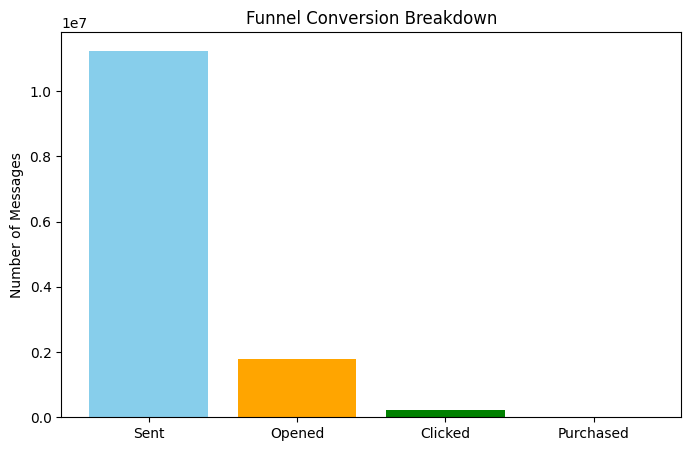

In [8]:
import matplotlib.pyplot as plt

stages = ['Sent', 'Opened', 'Clicked', 'Purchased']
counts = [total_messages, opened_messages, clicked_messages, purchased_messages]

plt.figure(figsize=(8,5))
plt.bar(stages, counts, color=['skyblue', 'orange', 'green', 'purple'])
plt.title("Funnel Conversion Breakdown")
plt.ylabel("Number of Messages")
plt.show()


In [9]:
campaign_type_performance = merged.groupby('campaign_type')['is_purchased'].mean().sort_values(ascending=False)
print(campaign_type_performance)


campaign_type
transactional    0.002548
trigger          0.002184
bulk             0.000353
Name: is_purchased, dtype: float64


In [10]:
channel_performance = merged.groupby('channel_x')['is_purchased'].mean().sort_values(ascending=False)
print(channel_performance)


channel_x
email          0.002085
mobile_push    0.000000
web_push       0.000000
Name: is_purchased, dtype: float64


/var/folders/6t/x4gsnlwd0rn1v_gv5fswcgjw0000gn/T/ipykernel_60783/2087009667.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=campaign_type_performance.index, y=campaign_type_performance.values, palette='viridis')


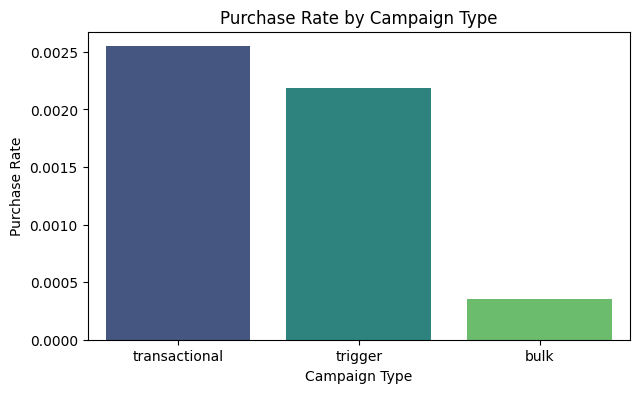

/var/folders/6t/x4gsnlwd0rn1v_gv5fswcgjw0000gn/T/ipykernel_60783/2087009667.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_performance.index, y=channel_performance.values, palette='mako')


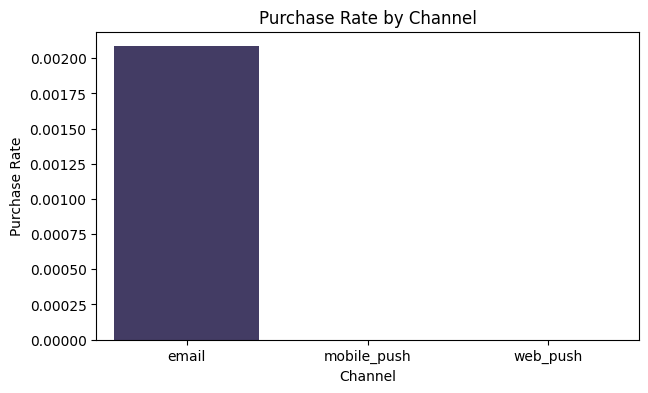

In [11]:
import seaborn as sns

plt.figure(figsize=(7,4))
sns.barplot(x=campaign_type_performance.index, y=campaign_type_performance.values, palette='viridis')
plt.title("Purchase Rate by Campaign Type")
plt.ylabel("Purchase Rate")
plt.xlabel("Campaign Type")
plt.show()

plt.figure(figsize=(7,4))
sns.barplot(x=channel_performance.index, y=channel_performance.values, palette='mako')
plt.title("Purchase Rate by Channel")
plt.ylabel("Purchase Rate")
plt.xlabel("Channel")
plt.show()


In [12]:
# Convert to datetime
merged['date'] = pd.to_datetime(merged['date'])
holiday['date'] = pd.to_datetime(holiday['date'])

# Create flag
merged['is_holiday'] = merged['date'].isin(holiday['date'])


In [13]:
holiday_performance = merged.groupby('is_holiday')['is_purchased'].mean()
print(holiday_performance)


is_holiday
False    0.001066
True     0.003566
Name: is_purchased, dtype: float64


/var/folders/6t/x4gsnlwd0rn1v_gv5fswcgjw0000gn/T/ipykernel_60783/775982931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_performance.index.map({False: 'Non-Holiday', True: 'Holiday'}),


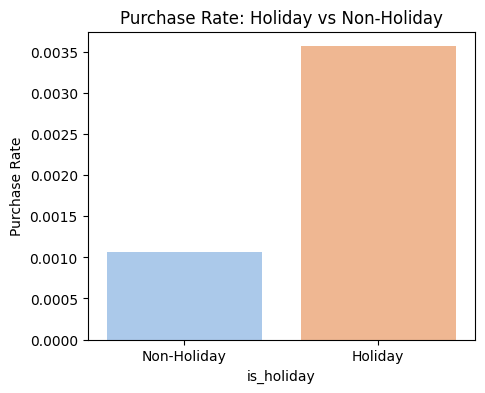

In [14]:
plt.figure(figsize=(5,4))
sns.barplot(x=holiday_performance.index.map({False: 'Non-Holiday', True: 'Holiday'}),
            y=holiday_performance.values, palette='pastel')
plt.title("Purchase Rate: Holiday vs Non-Holiday")
plt.ylabel("Purchase Rate")
plt.show()


In [15]:
merged['first_purchase_date'] = pd.to_datetime(merged['first_purchase_date'])


In [16]:
# Existing client if first purchase was before message date
merged['is_existing_client'] = merged['first_purchase_date'] < merged['date']


In [17]:
client_perf = merged.groupby('is_existing_client')['is_purchased'].mean()
print(client_perf)


is_existing_client
False    0.001101
Name: is_purchased, dtype: float64


/var/folders/6t/x4gsnlwd0rn1v_gv5fswcgjw0000gn/T/ipykernel_60783/2531828650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=client_perf.index.map({True: 'Existing Client', False: 'New Client'}),


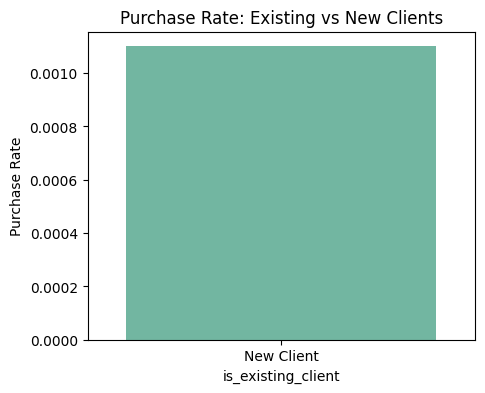

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.barplot(x=client_perf.index.map({True: 'Existing Client', False: 'New Client'}),
            y=client_perf.values, palette='Set2')
plt.title("Purchase Rate: Existing vs New Clients")
plt.ylabel("Purchase Rate")
plt.show()


In [19]:
print(merged.groupby('is_existing_client')['is_opened'].mean())
print(merged.groupby('is_existing_client')['is_clicked'].mean())


is_existing_client
False    0.158
Name: is_opened, dtype: float64
is_existing_client
False    0.021126
Name: is_clicked, dtype: float64


In [20]:
total_sent = len(merged)
total_opened = merged['is_opened'].sum()
total_clicked = merged['is_clicked'].sum()
total_purchased = merged['is_purchased'].sum()

open_rate = total_opened / total_sent
click_rate = total_clicked / total_opened
purchase_rate = total_purchased / total_clicked

print(f"Open Rate: {open_rate:.2%}")
print(f"Click-Through Rate (CTR): {click_rate:.2%}")
print(f"Purchase Conversion from Clicks: {purchase_rate:.2%}")


Open Rate: 15.80%
Click-Through Rate (CTR): 13.37%
Purchase Conversion from Clicks: 5.21%


In [21]:
from sklearn.cluster import KMeans
import numpy as np

# Aggregate by client
client_df = merged.groupby('client_id').agg({
    'is_opened': 'mean',
    'is_clicked': 'mean',
    'is_purchased': 'mean',
    'message_id': 'count'
}).rename(columns={'message_id': 'message_count'})

# Prepare for clustering
X = client_df[['is_opened', 'is_clicked', 'is_purchased', 'message_count']].fillna(0)

# Fit KMeans (choose k=3 or k=4)
kmeans = KMeans(n_clusters=3, random_state=42)
client_df['segment'] = kmeans.fit_predict(X)

client_df['segment'].value_counts()


segment
2    2029506
0    1285748
1      37168
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Example features
features = merged[['is_opened', 'is_clicked']]
target = merged['is_purchased']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00   3370019
        True       0.00      0.00      0.00      3766

    accuracy                           1.00   3373785
   macro avg       0.50      0.50      0.50   3373785
weighted avg       1.00      1.00      1.00   3373785



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


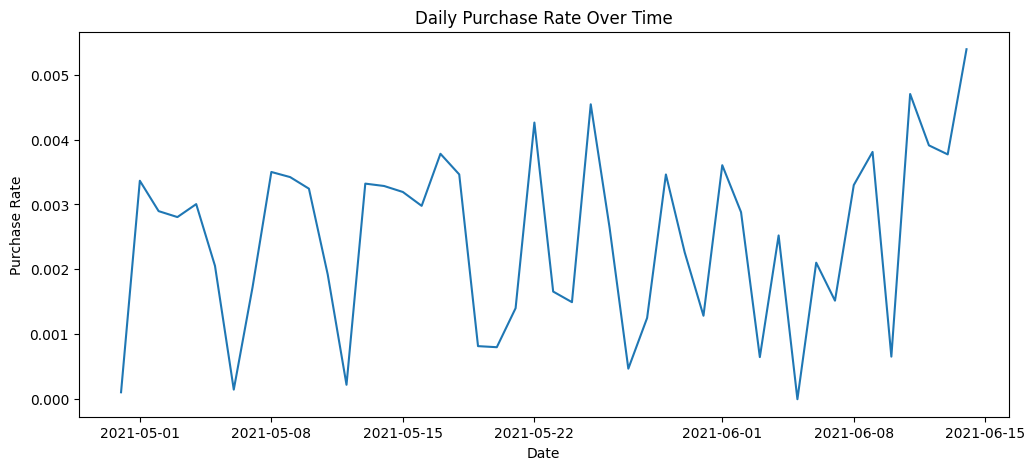

In [23]:
merged['date'] = pd.to_datetime(merged['date'])
daily_purchases = merged.groupby(merged['date'].dt.date)['is_purchased'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
daily_purchases.plot()
plt.title("Daily Purchase Rate Over Time")
plt.ylabel("Purchase Rate")
plt.xlabel("Date")
plt.show()


In [24]:
from sklearn.ensemble import RandomForestClassifier

features = merged[['is_opened', 'is_clicked', 'is_existing_client', 'is_holiday']].fillna(0)
target = merged['is_purchased']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
print(classification_report(y_test, rf.predict(X_test)))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00   3370019
        True       0.00      0.00      0.00      3766

    accuracy                           1.00   3373785
   macro avg       0.50      0.50      0.50   3373785
weighted avg       1.00      1.00      1.00   3373785



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Your merged dataframe already exists
# Filter only useful columns
ml_data = merged[[
    'is_opened', 
    'is_clicked', 
    'campaign_subject_length', 
    'campaign_subject_with_emoji',
    'is_holiday',
    'is_purchased'
]].dropna()

# Convert True/False to 1/0
ml_data = ml_data.replace({True: 1, False: 0})

# Features & Target
X = ml_data.drop('is_purchased', axis=1)
y = ml_data['is_purchased']

# Split data for training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Results
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Detailed Report:")
print(classification_report(y_test, y_pred))


/var/folders/6t/x4gsnlwd0rn1v_gv5fswcgjw0000gn/T/ipykernel_60783/919771083.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ml_data = ml_data.replace({True: 1, False: 0})


Accuracy: 99.92%
Confusion Matrix:
[[2729958       0]
 [   2267       0]]
Detailed Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2729958
           1       0.00      0.00      0.00      2267

    accuracy                           1.00   2732225
   macro avg       0.50      0.50      0.50   2732225
weighted avg       1.00      1.00      1.00   2732225



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  